<a href="https://colab.research.google.com/github/ashleyliang08/TestRepo/blob/main/lec9_mod4_Box_Plot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Box Plots**


In this lab, I will focus on the visualization of data using box plot. The dataset will be provided through an RDBMS, and I will use SQL queries to extract the required data.


### Setup: Connecting to the Database


#### 1. Download the Database File


In [ ]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite

--2025-09-10 11:58:10--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 211415040 (202M) [application/octet-stream]
Saving to: ‘survey-results-public.sqlite.6’

survey-results-publ 100%[===================>] 201.62M  60.9MB/s    in 3.3s    

2025-09-10 11:58:15 (60.5 MB/s) - ‘survey-results-public.sqlite.6’ saved [211415040/211415040]



#### 2. Connect to the Database


**Install the needed libraries**


In [ ]:
 !pip install pandas

In [ ]:
!pip install matplotlib

In [ ]:
!pip install seaborn

In [ ]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Connect to the SQLite database
conn = sqlite3.connect('survey-results-public.sqlite')


## Demo: Basic SQL Queries


#### Demo 1: Count the Number of Rows in the Table


In [ ]:
QUERY = "SELECT COUNT(*) FROM main"
df = pd.read_sql_query(QUERY, conn)
print(df)


   COUNT(*)
0     65437


#### Demo 2: List All Tables


In [ ]:
QUERY = """
SELECT name as Table_Name
FROM sqlite_master
WHERE type = 'table'
"""
pd.read_sql_query(QUERY, conn)


,Table_Name
0,main


#### Demo 3: Group Data by Age


In [ ]:
QUERY = """
SELECT Age, COUNT(*) as count
FROM main
GROUP BY Age
ORDER BY Age
"""
df_age = pd.read_sql_query(QUERY, conn)
print(df_age)


                  Age  count
0     18-24 years old  14098
1     25-34 years old  23911
2     35-44 years old  14942
3     45-54 years old   6249
4     55-64 years old   2575
5   65 years or older    772
6   Prefer not to say    322
7  Under 18 years old   2568


## Visualizing Data


### Task 1: Visualizing the Distribution of Data


**1. Box Plot of `CompTotal` (Total Compensation)**


Use a box plot to analyze the distribution and outliers in total compensation.


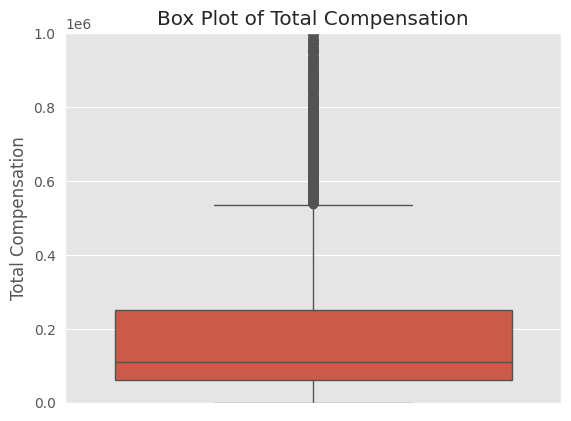

In [ ]:
# your code goes here
#fetch data
QUERY = """
SELECT CompTotal
FROM main
where CompTotal is not null
"""
df_CompTotal = pd.read_sql_query(QUERY, conn)
df_CompTotal
#plot
plt.figure()
plt.ylim(0,1000000)
sns.boxplot(data = df_CompTotal,y = 'CompTotal')
plt.title('Box Plot of Total Compensation')
plt.ylabel('Total Compensation')
plt.show()

**2. Box Plot of Age (converted to numeric values)**


Convert the `Age` column into numerical values and visualize the distribution.


<Figure size 1000x600 with 0 Axes>

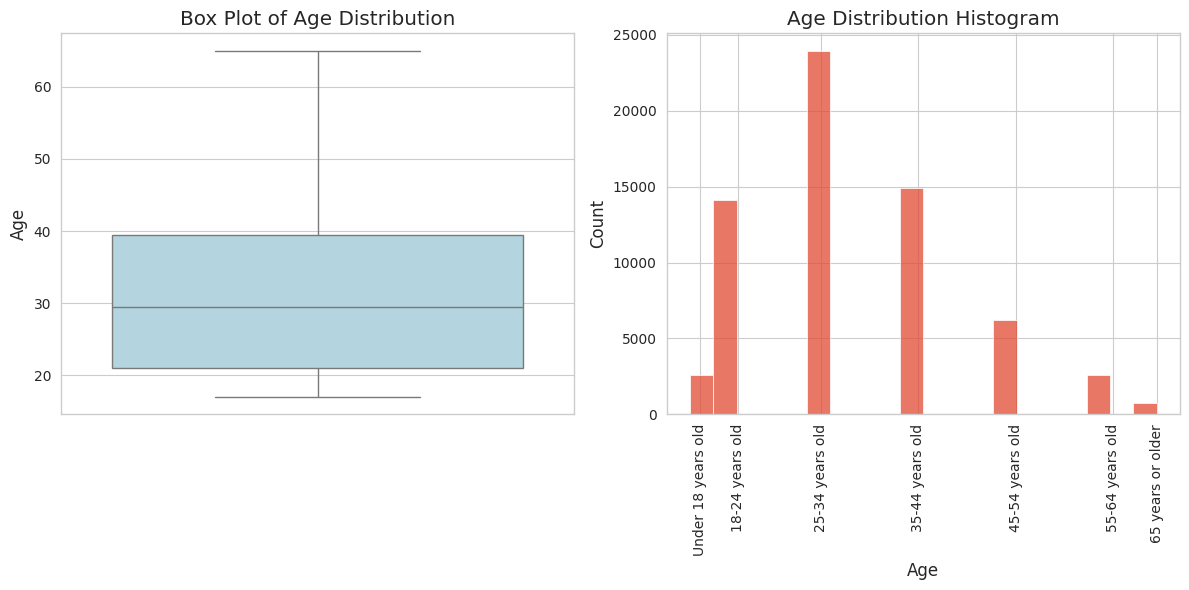

In [ ]:
# your code goes here
#fetch data
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# fetch data
QUERY = """SELECT Age FROM main WHERE Age IS NOT NULL"""
df_age = pd.read_sql_query(QUERY, conn)

# data wrangling
def convert_age(age):
    if age == 'Under 18 years old':
        return 17
    elif age == '18-24 years old':
        return 21
    elif age == '25-34 years old':
        return 29.5
    elif age == '35-44 years old':
        return 39.5
    elif age == '45-54 years old':
        return 49.5
    elif age == '55-64 years old':
        return 59.5
    elif age == '65 years or older':
        return 65
    else:  # for unexpected
        return None

df_age['Age_numeric'] = df_age['Age'].apply(convert_age)
df_age = df_age.dropna(subset=['Age_numeric'])
#
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")

#plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
#box plot
sns.boxplot(data=df_age, y='Age_numeric', ax=ax1, color='lightblue')
ax1.set_title('Box Plot of Age Distribution')
ax1.set_ylabel('Age')
# histogram
sns.histplot(data=df_age, x='Age_numeric', bins=20, ax=ax2, kde=False)
ax2.set_title('Age Distribution Histogram')
ax2.set_xlabel('Age')
# set x ticks labels
age_labels = [
    'Under 18 years old',
    '18-24 years old',
    '25-34 years old',
    '35-44 years old',
    '45-54 years old',
    '55-64 years old',
    '65 years or older'
]

# set x ticks-labels position
age_positions = [18, 22, 30.5, 40.5, 50.5, 60.5, 65]
ax2.set_xticks(age_positions)
ax2.set_xticklabels(age_labels,rotation = 90)

plt.tight_layout()
plt.show()

### Task 2: Visualizing Relationships in Data


**1. Box Plot of `CompTotal` Grouped by Age Groups:**


Visualize the distribution of compensation across different age groups.


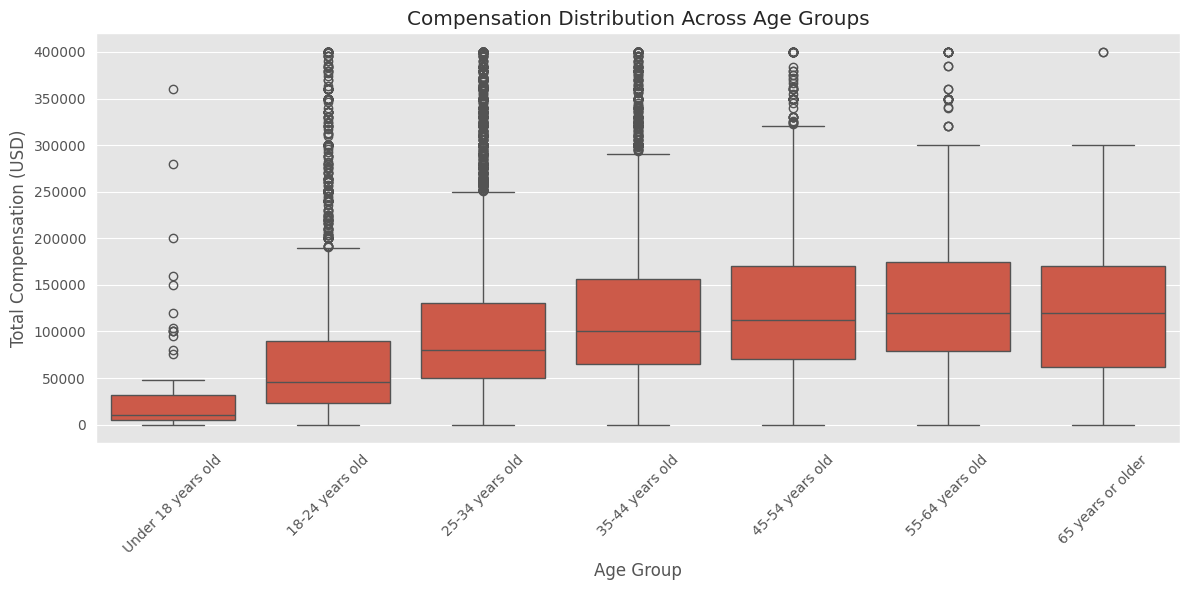

In [ ]:
# your code goes here
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# fetch data
QUERY = """
SELECT Age, CompTotal
FROM main
WHERE Age IS NOT NULL AND CompTotal IS NOT NULL
"""
df_age_comp = pd.read_sql_query(QUERY, conn)

# 过滤极端高薪值!!!!还能这样！！！！
# 计算第80百分位数作为上限
comp_upper_limit = df_age_comp['CompTotal'].quantile(0.80)
df_age_comp_filtered = df_age_comp[df_age_comp['CompTotal'] <= comp_upper_limit]

# plot
plt.figure(figsize=(12, 6))
plt.style.use('ggplot')
# box
sns.boxplot(
    data=df_age_comp_filtered,
    x='Age',
    y='CompTotal',
    order=[
        'Under 18 years old',
        '18-24 years old',
        '25-34 years old',
        '35-44 years old',
        '45-54 years old',
        '55-64 years old',
        '65 years or older'
    ]
)

plt.title('Compensation Distribution Across Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Total Compensation (USD)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**2. Box Plot of `CompTotal` Grouped by Job Satisfaction (`JobSatPoints_6`):**


Examine how compensation varies based on job satisfaction levels.


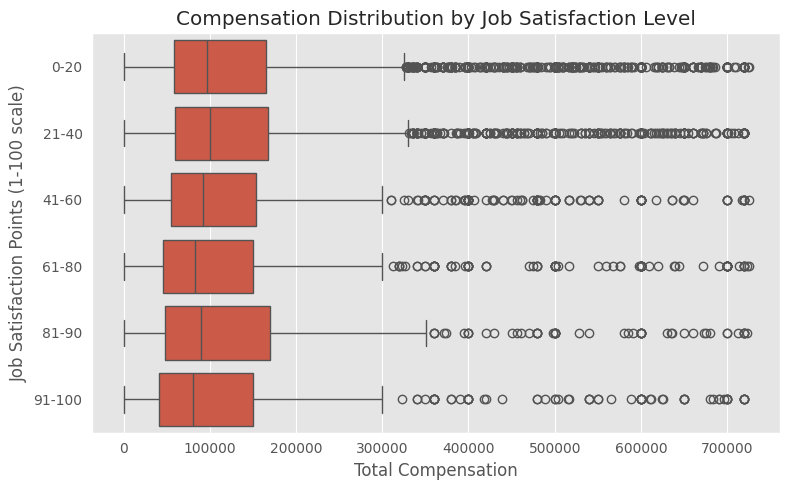

In [ ]:
# 获取数据
QUERY = """
SELECT CompTotal, JobSatPoints_6
FROM main
WHERE CompTotal IS NOT NULL AND JobSatPoints_6 IS NOT NULL
"""
df_jobsat_comp = pd.read_sql_query(QUERY, conn)
# 查看满意度分数的分布
#print(df_jobsat_comp['JobSatPoints_6'].value_counts().sort_index())
# 将0-100的满意度分数分成6个组（每16-17分一组）
df_jobsat_comp['JobSatGroup'] = pd.cut(
    df_jobsat_comp['JobSatPoints_6'],
    bins=[0.0, 20.0, 40.0, 60.0, 80.0, 90.0, 100.0],
    labels=['0-20', '21-40', '41-60', '61-80', '81-90', '91-100']
)
df_jobsat_comp = df_jobsat_comp[df_jobsat_comp['JobSatGroup'].notna()]
df_jobsat_comp
#df_jobsat_comp.isnull().sum()
# 处理极端薪酬值（使用99%分位数作为上限）
comp_upper_limit = df_jobsat_comp['CompTotal'].quantile(0.85)
df_filtered = df_jobsat_comp[df_jobsat_comp['CompTotal'] <= comp_upper_limit]
df_filtered
# 创建可视化
plt.figure(figsize=(8,5))
# 创建箱线图
sns.boxplot(
    data=df_filtered,
    y='JobSatGroup',  # 作为分类变量
    x='CompTotal'
)

plt.title('Compensation Distribution by Job Satisfaction Level')
plt.ylabel('Job Satisfaction Points (1-100 scale)')
plt.xlabel('Total Compensation')
plt.tight_layout()
plt.show()



### Task 3: Visualizing the Composition of Data


**1. Box Plot of `ConvertedCompYearly` for the Top 5 Developer Types:**


Analyze compensation across the top 5 developer roles.


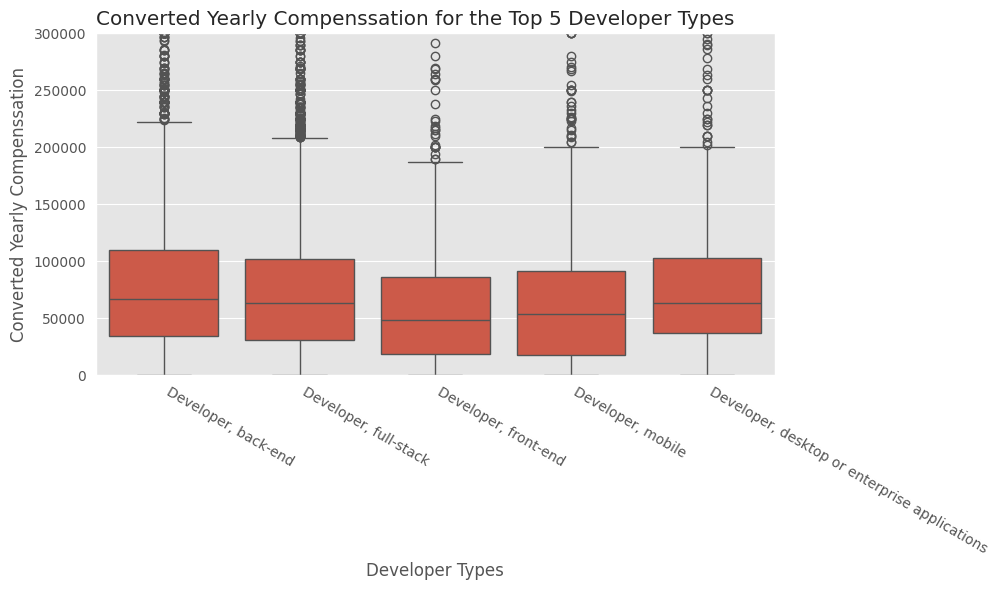

In [ ]:
# your code goes here
#fetch data
QUERY = """
SELECT DevType,ConvertedCompYearly
FROM main
WHERE DevType IS NOT NULL AND ConvertedCompYearly IS NOT NULL
"""
df_role_comp = pd.read_sql_query(QUERY, conn)
top_5_roles = list(df_role_comp['DevType'].value_counts().head(5).index)
df_filtered = df_role_comp[df_role_comp['DevType'].isin(top_5_roles)]
#plot
plt.figure(figsize=(10,6))
# 创建箱线图
sns.boxplot(
    data=df_filtered,
    x='DevType',  # 作为分类变量
    y='ConvertedCompYearly'
)

plt.title('Converted Yearly Compenssation for the Top 5 Developer Types',loc = 'left')
plt.ylabel('Converted Yearly Compenssation')
plt.ylim(0,300000)
plt.xlabel('Developer Types')
plt.xticks(rotation=-30, ha = 'left')
plt.tight_layout()
plt.show()



**2. Box Plot of `CompTotal` for the Top 5 Countries:**


Analyze compensation across respondents from the top 5 countries.


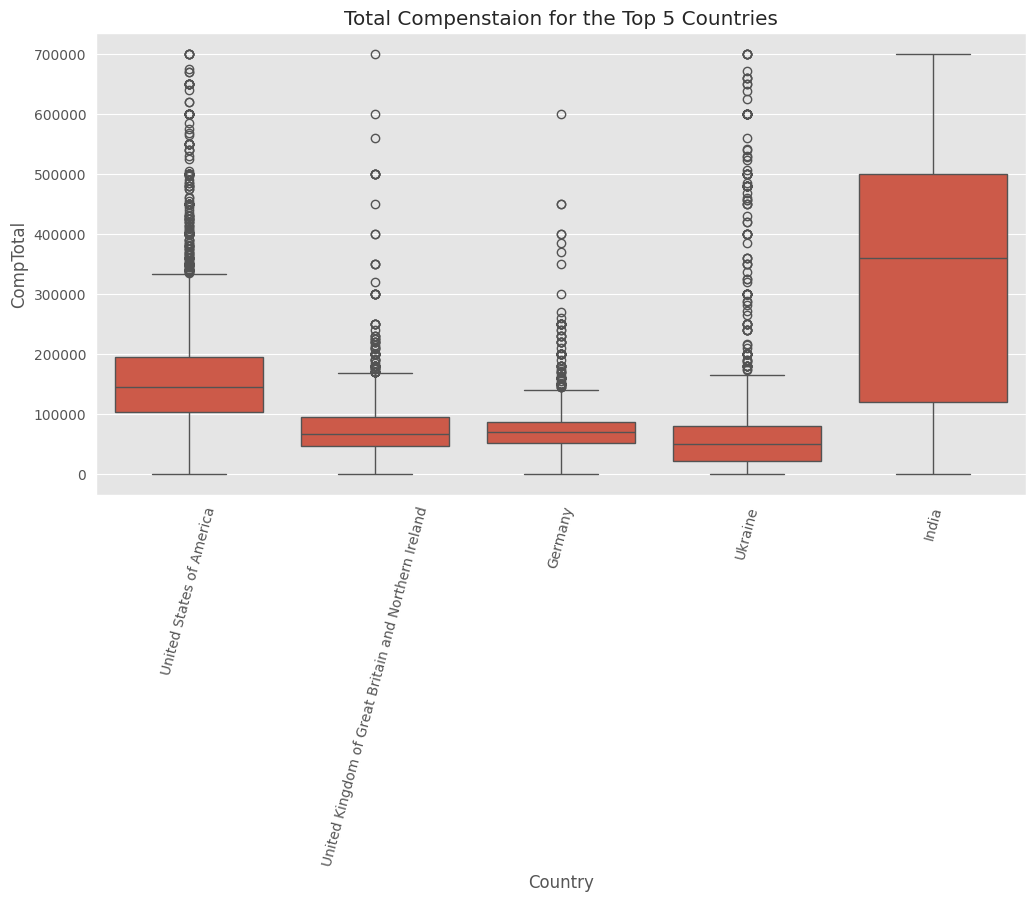

In [ ]:
# your code goes here
#fetch data
QUERY = """
SELECT Country,CompTotal
FROM main
WHERE CompTotal IS NOT NULL
"""
df_coun_comp = pd.read_sql_query(QUERY, conn)
#data wrangling
top_5_coun = list(df_coun_comp['Country'].value_counts().head(5).index)
df_filtered = df_coun_comp[df_coun_comp['Country'].isin(top_5_coun)]
df_filtered
#filter data to exclude some outliers
comp_upper_limit = df_filtered['CompTotal'].quantile(0.9)
df_filtered1 = df_filtered[df_filtered['CompTotal'] <= comp_upper_limit]
#plot
plt.figure(figsize= (12,6))
plt.style.use('ggplot')
sns.boxplot(data = df_filtered1,x = 'Country',y = 'CompTotal')
plt.xticks(top_5_coun,rotation = 75)
plt.title('Total Compenstaion for the Top 5 Countries')
plt.show()


### Task 4: Visualizing Comparison of Data


**1. Box Plot of CompTotal Across Employment Types:**


Analyze compensation for different employment types.


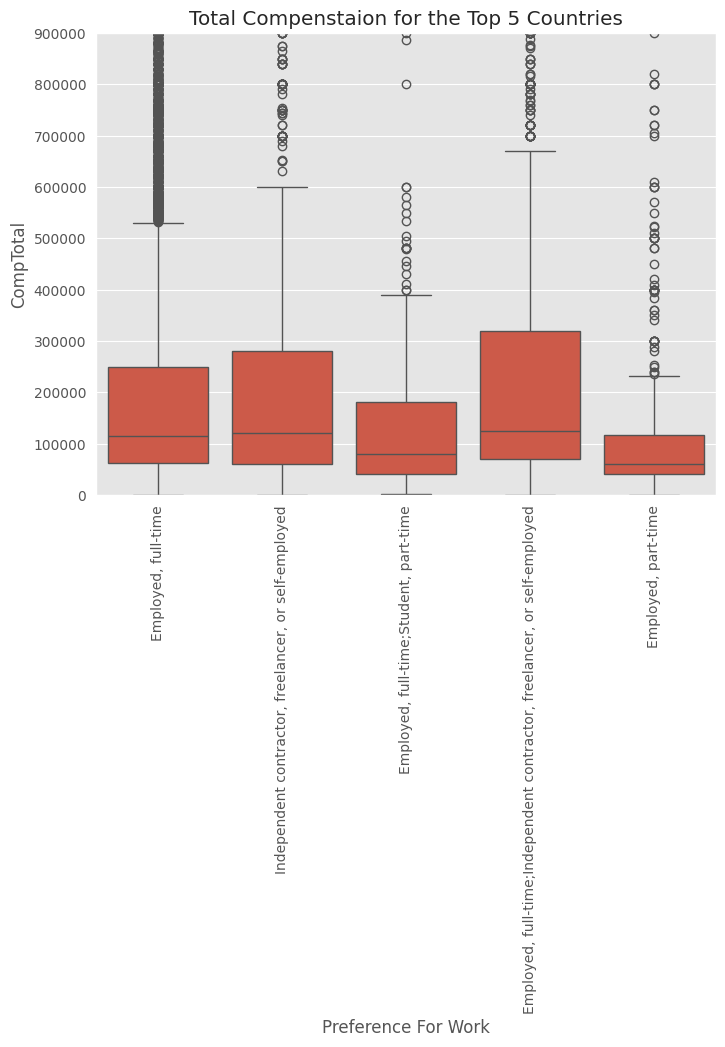

In [ ]:
# your code goes here
QUERY = """
SELECT Employment,CompTotal
FROM main
WHERE CompTotal and Employment IS NOT NULL
"""
df_emp_comp = pd.read_sql_query(QUERY, conn)
#data wrangling
top_5_emp = list(df_emp_comp['Employment'].value_counts().head(5).index)
df_filtered = df_emp_comp[df_emp_comp['Employment'].isin(top_5_emp)]
df_filtered
#filter data to exclude some outliers
#comp_upper_limit = df_filtered['CompTotal'].quantile(0.75)
#df_filtered1 = df_filtered[df_filtered['CompTotal'] <= comp_upper_limit]
#plot
plt.figure(figsize= (8,6))
plt.style.use('ggplot')
sns.boxplot(data = df_filtered,x = 'Employment',y = 'CompTotal')
plt.ylim(0,900000)
plt.xticks(top_5_emp,rotation = 90)
plt.xlabel('Preference For Work')
plt.title('Total Compenstaion for the Top 5 Countries')
plt.show()

**2. Box Plot of `YearsCodePro` by Job Satisfaction (`JobSatPoints_6`):**


Examine the distribution of professional coding years by job satisfaction levels.


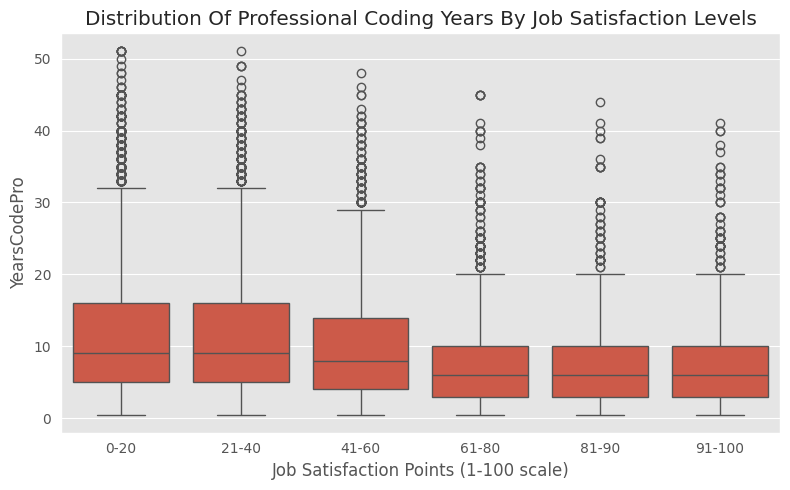

In [ ]:
# your code goes here
# fetch data
QUERY = """
SELECT YearsCodePro, JobSatPoints_6
FROM main
WHERE YearsCodePro IS NOT NULL AND JobSatPoints_6 IS NOT NULL
"""
df_jobsat_code = pd.read_sql_query(QUERY, conn)
df_jobsat_code
#data wrangling

# 1.categorize job_sat
df_jobsat_code['JobSatGroup'] = pd.cut(
    df_jobsat_code['JobSatPoints_6'],
    bins=[0.0, 20.0, 40.0, 60.0, 80.0, 90.0, 100.0],
    labels=['0-20', '21-40', '41-60', '61-80', '81-90', '91-100']
)

df_jobsat_code['YearsCodePro'].unique()
#2. years of coding
def year_of_code(years):
    if years == 'Less than 1 year':
        return 0.5
    elif years == 'More than 50 years':
        return 51
    else:
        try:
            return float(years)
        except:
            return None
df_jobsat_code['YearsCodePro_num'] = df_jobsat_code['YearsCodePro'].apply(year_of_code)
df_jobsat_code = df_jobsat_code[df_jobsat_code['JobSatGroup'].notna()]
df_filtered = df_jobsat_code[['YearsCodePro_num','JobSatGroup']]


#plot
plt.figure(figsize=(8,5))

sns.boxplot(
    data=df_filtered,
    y='YearsCodePro_num',  # 作为分类变量
    x='JobSatGroup'
)

plt.title('Distribution Of Professional Coding Years By Job Satisfaction Levels')
plt.ylabel('YearsCodePro')
plt.xlabel('Job Satisfaction Points (1-100 scale)')
plt.tight_layout()
plt.show()







### Final Step: Close the Database Connection


After completing the lab, close the connection to the SQLite database:


In [ ]:
conn.close()

## Summary


In this lab, you used box plots to visualize various aspects of the dataset, focusing on:

- Visualize distributions of compensation and age.

- Explore relationships between compensation, job satisfaction, and professional coding experience.

- Analyze data composition across developer roles and countries.

- Compare compensation across employment types and satisfaction levels.

Box plots provided clear insights into the spread, outliers, and central tendencies of various features in the dataset.


## Authors:
Ashley Liang
